# **Kelompok 12**

Anggota Kelompok:
1. Kia Kurniawan
2. Ikhwan Ash-shiddqi

Kasus: Crypto Solana (SOL)


In [ ]:
import yfinance as yf
import pandas as pd

# Tentukan kode untuk DBS Group Holdings Ltd
kode_crypto = "SOL"

# Tentukan rentang waktu
start_date = "2019-01-01"
end_date = "2025-05-18"

# Ambil data menggunakan yfinance
df = yf.download(kode_crypto, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SOL,SOL,SOL,SOL,SOL
Date,,,,,
2019-01-02,1.25,1.25,1.16,1.18,21700
2019-01-03,1.25,1.25,1.21,1.25,3100
2019-01-04,1.33,1.34,1.23,1.25,36700
2019-01-07,1.36,1.37,1.30,1.37,15600
2019-01-08,1.36,1.37,1.33,1.35,8400


In [ ]:
# Import data
import pandas as pd

df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2019-01-02,1.25,1.25,1.16,1.18,21700
1,2019-01-03,1.25,1.25,1.21,1.25,3100
2,2019-01-04,1.33,1.34,1.23,1.25,36700
3,2019-01-07,1.36,1.37,1.30,1.37,15600
4,2019-01-08,1.36,1.37,1.33,1.35,8400


In [ ]:
# Mengambil kolom Date dan Close
data = df[['Date', 'Close']]
data.tail()

,Date,Close
1598,2025-05-12,1.52
1599,2025-05-13,1.60
1600,2025-05-14,1.59
1601,2025-05-15,1.56
1602,2025-05-16,1.58


In [ ]:
# Melihat informasi pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1603 non-null   datetime64[ns]
 1   Close   1603 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.2 KB


In [ ]:
# Melihat data yang kosong
data.isna().sum()

,0
Date,0
Close,0


In [ ]:
# Melihat deskripsi data
data.describe()

,Date,Close
count,1603,1603.000000
mean,2022-03-08 13:17:42.258265856,4.027211
min,2019-01-02 00:00:00,0.860000
25%,2020-08-04 12:00:00,1.610000
50%,2022-03-08 00:00:00,2.580000
75%,2023-10-10 12:00:00,5.220000
max,2025-05-16 00:00:00,33.549999
std,NaN,3.807905


In [ ]:
# Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense, Input
from keras.layers import GRU

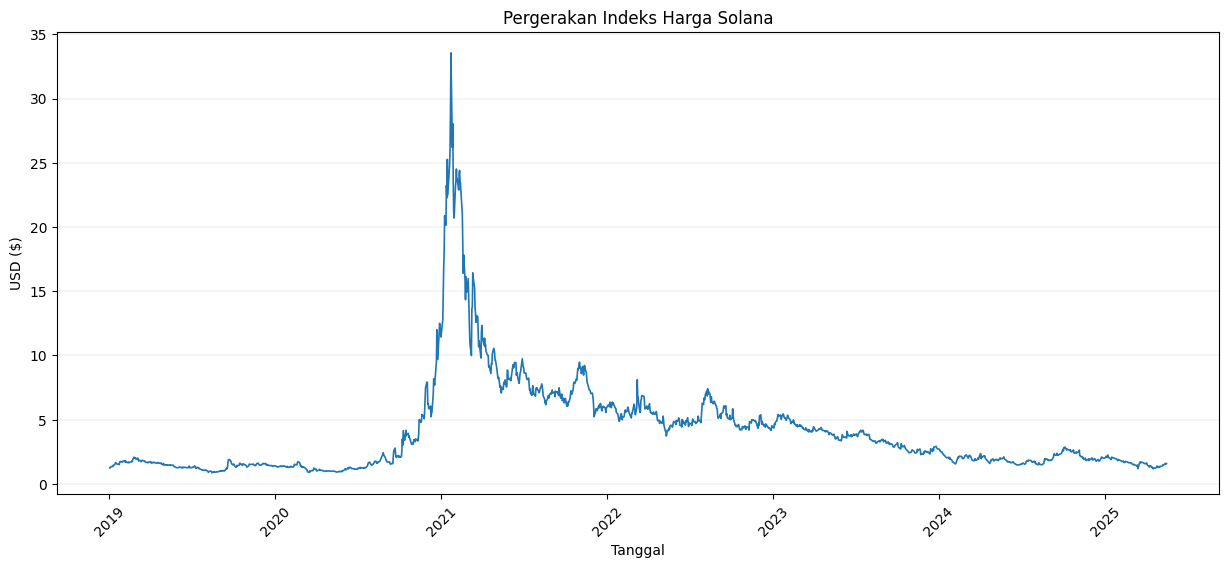

In [ ]:
# Visualisasi data
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(15,6))
plt.title('Pergerakan Indeks Harga Solana')
plt.plot(data['Date'], data['Close'], linewidth=1.2)
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [ ]:
# Melakukan normalisasi data
sc = MinMaxScaler(feature_range=(0, 1))
data_sc = sc.fit_transform(data[['Close']].values)
data_sc

array([[0.01193025],
       [0.01193025],
       [0.01437749],
       ...,
       [0.02233099],
       [0.02141327],
       [0.02202509]])

In [ ]:
# norm = pd.DataFrame(data_sc)
# norm.head()

In [ ]:
# norm.to_excel('Hasil_Normalisasi.xlsx')

In [ ]:
# Pembagian data (80% training, 10% testing, 10% validasi)
train_len = int(len(data_sc) * 0.8)
test_len = int(len(data_sc) * 0.10)
val_len = len(data_sc) - train_len - test_len

In [ ]:
# Menampilkan jumlah data
print(f'Jumlah data keseluruhan: {len(data_sc)}')
print(f'Jumlah data training: {train_len}')
print(f'Jumlah data validasi: {val_len}')
print(f'Jumlah data testing:{test_len}')

Jumlah data keseluruhan: 1603
Jumlah data training: 1282
Jumlah data validasi: 161
Jumlah data testing:160


In [ ]:
# Membuat Windowing pada data Training
train_data = data_sc[0:train_len  , : ]
x_train=[]
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
# Membuat Windowing pada data Validation
val_data = data_sc[train_len - 30:(train_len + val_len) , : ]
x_val = []
y_val = []
for i in range(30,len(val_data)):
    x_val.append(val_data[i-30:i,0])
    y_val.append(val_data[i,0])

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_val, y_val = np.array(x_val), np.array(y_val)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))

# BI-GRU

In [ ]:
# Membangun model Bi-GRU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_bigru = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Bidirectional(GRU(100, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(GRU(100, return_sequences=False)),
    Dropout(0.2),
    Dense(1)
])

In [ ]:
# Path GRU model checkpoint
checkpoint_path_bigru = 'model_checkpoints/weights_bigru_model.weights.h5'
checkpoint_bigru = ModelCheckpoint(
    filepath=checkpoint_path_bigru,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [ ]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

In [ ]:
# Compile model Bi-GRU (pastikan variabel `op` terdefinisi, atau ganti langsung dengan 'adam')
model_bigru.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Training model Bi-GRU
history_bigru = model_bigru.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_bigru, early_stopping]
)

Epoch 1/100
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020
Epoch 1: val_loss improved from inf to 0.00007, saving model to model_checkpoints/weights_bigru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0020 - val_loss: 7.1602e-05
Epoch 2/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.5587e-04
Epoch 2: val_loss improved from 0.00007 to 0.00002, saving model to model_checkpoints/weights_bigru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9.5487e-04 - val_loss: 1.5120e-05
Epoch 3/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2010e-04
Epoch 3: val_loss did not improve from 0.00002
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 9.2095e-04 - val_loss: 1.8121e-04
Epoch 4/100
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.3138e-04
Epoch 4: val_loss improved from 0.00002 to 0.00001, saving model to model_checkpoints/weights_bigru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 7.3083e-04 - val_los

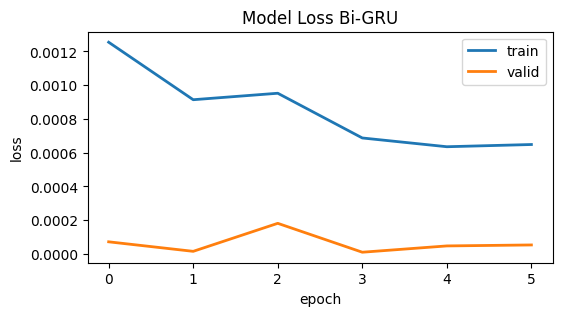

In [ ]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_bigru.history['loss'], linewidth=2)
plt.plot(history_bigru.history['val_loss'], linewidth=2)
plt.title('Model Loss Bi-GRU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [ ]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh BI-GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Load bobot model GRU terbaik
model_bigru.load_weights("/content/model_checkpoints/weights_bigru_model.weights.h5")

In [ ]:
# Melakukan prediksi
y_pred_bigru = model_bigru.predict(x_test)
y_pred_bigru = np.ceil(sc.inverse_transform(y_pred_bigru))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Evaluasi Bi-GRU
mse_bigru = round(mean_squared_error(y_test, y_pred_bigru), 2)
rmse_bigru = round(np.sqrt(np.mean(y_test - y_pred_bigru)**2), 2)
mae_bigru = round(mean_absolute_error(y_test, y_pred_bigru), 2)
mape_bigru = round(mean_absolute_percentage_error(y_test, y_pred_bigru)*100, 2)

print("\n📊 Evaluasi Bi-GRU Model:")
print(f'MSE  : {mse_bigru}')
print(f'RMSE : {rmse_bigru}')
print(f'MAE  : {mae_bigru}')
print(f'MAPE : {mape_bigru} %')


📊 Evaluasi Bi-GRU Model:
MSE  : 0.31
RMSE : 0.48
MAE  : 0.48
MAPE : 27.3 %


In [ ]:
# dataframe hasil prediksi BI-GRU
data_pred_bigru = data[-test_len:].copy()
data_pred_bigru['Prediction_BIGRU'] = y_pred_bigru

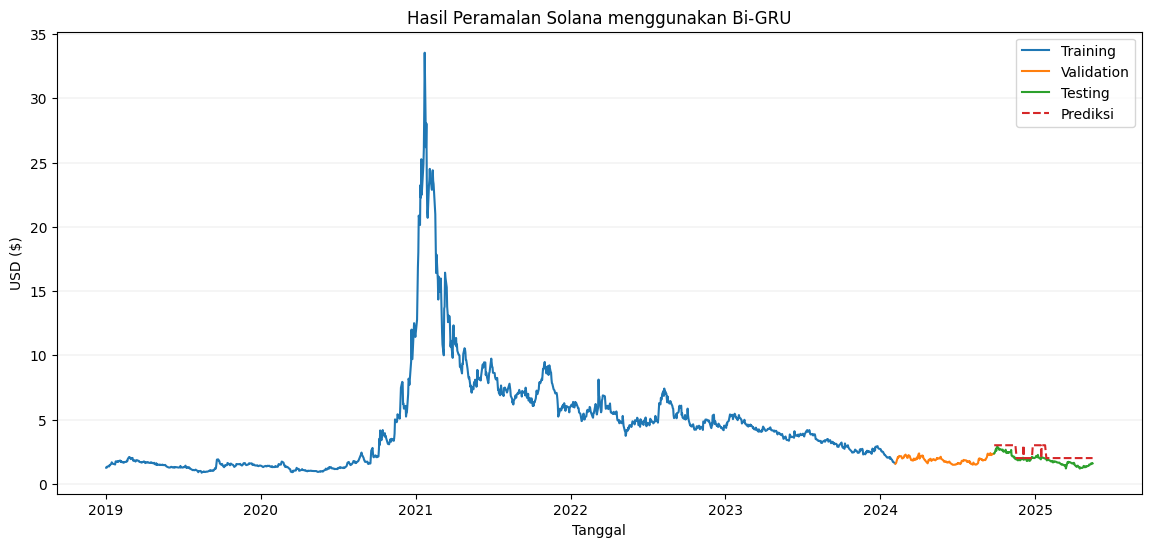

In [ ]:
# Visualisasi Hasil Prediksi BI-GRU
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Solana menggunakan Bi-GRU')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_bigru['Date'], data_pred_bigru['Close'], label='Testing')
plt.plot(data_pred_bigru['Date'], data_pred_bigru['Prediction_BIGRU'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [ ]:
# Ambil 30 hari terakhir sebagai input awal
last_30_bigru = data_sc[-30:]
input_pred_bigru = last_30_bigru.reshape(1, 30, 1)

future_preds_bigru = []

for _ in range(30):
    next_pred_bigru = model_bigru.predict(input_pred_bigru, verbose=0)[0][0]
    future_preds_bigru.append(next_pred_bigru)

    # Perbarui jendela input
    next_input_bigru = np.append(input_pred_bigru[0, 1:, 0], next_pred_bigru)
    input_pred_bigru = next_input_bigru.reshape(1, 30, 1)

In [ ]:
# Invers transformasi skala
future_preds_inv_bigru = sc.inverse_transform(np.array(future_preds_bigru).reshape(-1, 1))
future_preds_inv_bigru = np.ceil(future_preds_inv_bigru)

In [ ]:
# Buat tanggal prediksi (hanya hari kerja)
from datetime import timedelta

last_date_bigru = pd.to_datetime(data['Date'].iloc[-1])
future_dates_bigru = []
curr_date_bigru = last_date_bigru + timedelta(days=1)

while len(future_dates_bigru) < 30:
    if curr_date_bigru.weekday() < 5:  # Hanya hari kerja
        future_dates_bigru.append(curr_date_bigru)
    curr_date_bigru += timedelta(days=1)

In [ ]:
# Buat DataFrame hasil prediksi BI-GRU
pred_30_bigru_df = pd.DataFrame({
    'Date': future_dates_bigru,
    'Prediction_BIGRU': future_preds_inv_bigru.flatten()
})

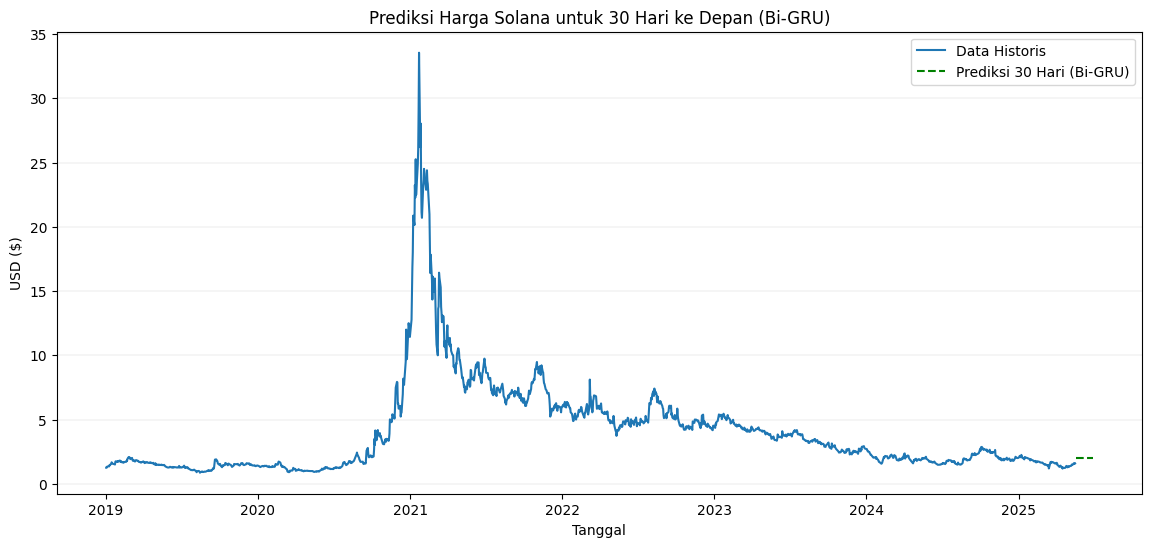

In [ ]:
# Visualisasi hasil prediksi 30 hari ke depan dengan Bi-GRU
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Solana untuk 30 Hari ke Depan (Bi-GRU)')
plt.plot(data['Date'], data['Close'], label='Data Historis')
plt.plot(pred_30_bigru_df['Date'], pred_30_bigru_df['Prediction_BIGRU'], label='Prediksi 30 Hari (Bi-GRU)', linestyle='--', color='green')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# **BI-LSTM**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from datetime import timedelta

# Membangun model Bi-LSTM
model_bilstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(100, return_sequences=False)),
    Dropout(0.2),
    Dense(1)
])

In [ ]:
# Path LSTM model checkpoint
checkpoint_path_bilstm = 'model_checkpoints/weights_bilstm_model.weights.h5'
checkpoint_bilstm = ModelCheckpoint(
    filepath=checkpoint_path_bilstm,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [ ]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

In [ ]:
# Compile model Bi-LSTM
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Training model Bi-LSTM
history_bilstm = model_bilstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_bilstm, early_stopping]
)

Epoch 1/100
153/157 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0080
Epoch 1: val_loss improved from inf to 0.00006, saving model to model_checkpoints/weights_bilstm_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0078 - val_loss: 6.0781e-05
Epoch 2/100
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015
Epoch 2: val_loss improved from 0.00006 to 0.00002, saving model to model_checkpoints/weights_bilstm_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0015 - val_loss: 2.2599e-05
Epoch 3/100
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.9972e-04
Epoch 3: val_loss did not improve from 0.00002
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 8.0275e-04 - val_loss: 0.0013
Epoch 4/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 4: val_loss did not improve from 0.00002
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0011 - val_loss: 3.2442e-05
Epoch 5/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.9625e-04
E

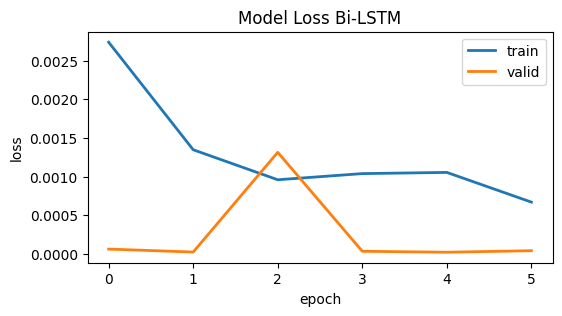

In [ ]:
# Plot loss
plt.figure(figsize=(6,3))
plt.plot(history_bilstm.history['loss'], linewidth=2)
plt.plot(history_bilstm.history['val_loss'], linewidth=2)
plt.title('Model Loss Bi-LSTM')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [ ]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
x_test = []
y_test = data[['Close']].iloc[-test_len:, :].values
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Load bobot model terbaik Bi-LSTM
model_bilstm.load_weights("/content/model_checkpoints/weights_bilstm_model.weights.h5")

In [ ]:
# Prediksi
y_pred_bilstm = model_bilstm.predict(x_test)
y_pred_bilstm = np.ceil(sc.inverse_transform(y_pred_bilstm))

# Evaluasi
mse_bilstm = round(mean_squared_error(y_test, y_pred_bilstm), 2)
rmse_bilstm = round(np.sqrt(np.mean(y_test - y_pred_bilstm)**2), 2)
mae_bilstm = round(mean_absolute_error(y_test, y_pred_bilstm), 2)
mape_bilstm = round(mean_absolute_percentage_error(y_test, y_pred_bilstm)*100, 2)

print("\n📊 Evaluasi Bi-LSTM Model:")
print(f'MSE  : {mse_bilstm}')
print(f'RMSE : {rmse_bilstm}')
print(f'MAE  : {mae_bilstm}')
print(f'MAPE : {mape_bilstm} %')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

📊 Evaluasi Bi-LSTM Model:
MSE  : 0.33
RMSE : 0.49
MAE  : 0.49
MAPE : 27.92 %


In [ ]:
# DataFrame hasil prediksi
data_pred_bilstm = data[-test_len:].copy()
data_pred_bilstm['Prediction_BILSTM'] = y_pred_bilstm

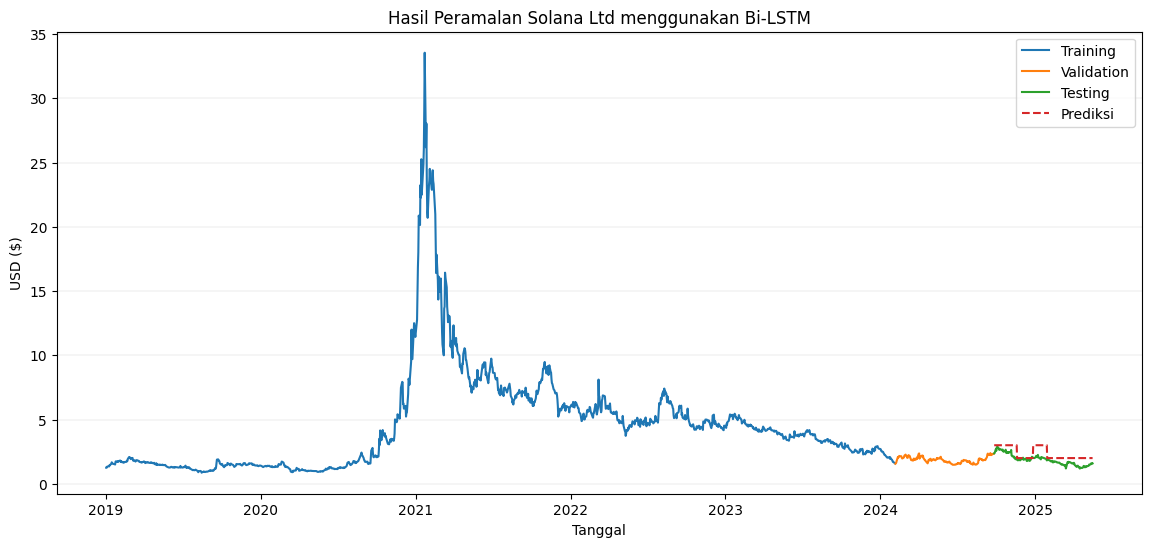

In [ ]:
# Visualisasi
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Solana Ltd menggunakan Bi-LSTM')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Close'], label='Testing')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Prediction_BILSTM'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [ ]:
# Prediksi 30 hari ke depan
last_30_bilstm = data_sc[-30:]
input_pred_bilstm = last_30_bilstm.reshape(1, 30, 1)

future_preds_bilstm = []

for _ in range(30):
    next_pred_bilstm = model_bilstm.predict(input_pred_bilstm, verbose=0)[0][0]
    future_preds_bilstm.append(next_pred_bilstm)

    next_input_bilstm = np.append(input_pred_bilstm[0, 1:, 0], next_pred_bilstm)
    input_pred_bilstm = next_input_bilstm.reshape(1, 30, 1)

In [ ]:
# Invers transformasi
future_preds_inv_bilstm = sc.inverse_transform(np.array(future_preds_bilstm).reshape(-1, 1))
future_preds_inv_bilstm = np.ceil(future_preds_inv_bilstm)

# Buat tanggal prediksi
last_date_bilstm = pd.to_datetime(data['Date'].iloc[-1])
future_dates_bilstm = []
curr_date_bilstm = last_date_bilstm + timedelta(days=1)

In [ ]:
while len(future_dates_bilstm) < 30:
    if curr_date_bilstm.weekday() < 5:
        future_dates_bilstm.append(curr_date_bilstm)
    curr_date_bilstm += timedelta(days=1)

# DataFrame hasil prediksi 30 hari ke depan
pred_30_bilstm_df = pd.DataFrame({
    'Date': future_dates_bilstm,
    'Prediction_BILSTM': future_preds_inv_bilstm.flatten()
})

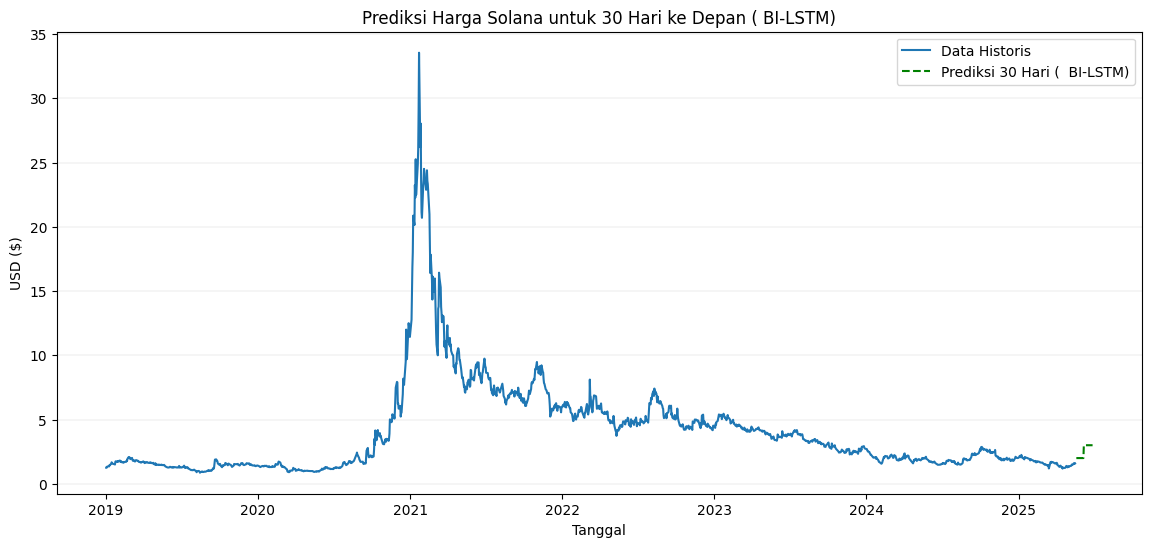

In [ ]:
# Visualisasi hasil prediksi 30 hari ke depan dengan  BI-LSTM
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Solana untuk 30 Hari ke Depan ( BI-LSTM)')
plt.plot(data['Date'], data['Close'], label='Data Historis')
plt.plot(pred_30_bilstm_df['Date'], pred_30_bilstm_df['Prediction_BILSTM'], label='Prediksi 30 Hari (  BI-LSTM)', linestyle='--', color='green')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# **GRU**

In [118]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

model_gru = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    GRU(100, return_sequences=True),
    Dropout(0.2),
    GRU(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [119]:
# Path GRU model checkpoint
checkpoint_path_gru = 'model_checkpoints/weights_gru_model.weights.h5'
checkpoint_gru = ModelCheckpoint(
    filepath=checkpoint_path_gru,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [120]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

In [121]:
# Compile model GRU
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Training model GRU
history_gru = model_gru.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_gru, early_stopping]
)

Epoch 1/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044
Epoch 1: val_loss improved from inf to 0.00034, saving model to model_checkpoints/weights_gru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0043 - val_loss: 3.3962e-04
Epoch 2/100
151/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 2: val_loss improved from 0.00034 to 0.00002, saving model to model_checkpoints/weights_gru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0012 - val_loss: 1.5454e-05
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.9071e-04
Epoch 3: val_loss did not improve from 0.00002
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.9096e-04 - val_loss: 3.2200e-05
Epoch 4/100
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4378e-04
Epoch 4: val_loss improved from 0.00002 to 0.00001, saving model to model_checkpoints/weights_gru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.4365e-04 - val_loss: 1.3043e-05
Epoch 5

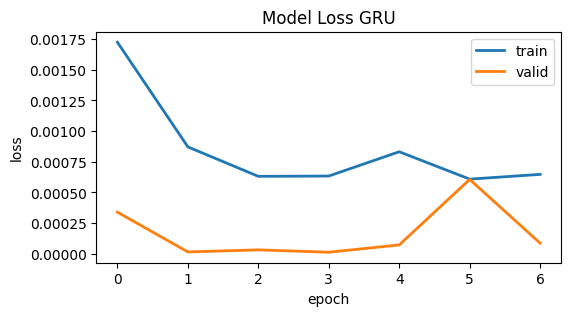

In [122]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_gru.history['loss'], linewidth=2)
plt.plot(history_gru.history['val_loss'], linewidth=2)
plt.title('Model Loss GRU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [123]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [124]:
# Load bobot model GRU terbaik
model_gru.load_weights("/content/model_checkpoints/weights_gru_model.weights.h5")

# Melakukan prediksi
y_pred_gru = model_gru.predict(x_test)
y_pred_gru = np.ceil(sc.inverse_transform(y_pred_gru))

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


In [125]:
# Evaluasi GRU
mse_gru = round(mean_squared_error(y_test, y_pred_gru), 2)
rmse_gru = round(np.sqrt(np.mean(y_test - y_pred_gru)**2), 2)
mae_gru = round(mean_absolute_error(y_test, y_pred_gru), 2)
mape_gru = round(mean_absolute_percentage_error(y_test, y_pred_gru)*100, 2)

print("\n📊 Evaluasi GRU Model:")
print(f'MSE  : {mse_gru}')
print(f'RMSE : {rmse_gru}')
print(f'MAE  : {mae_gru}')
print(f'MAPE : {mape_gru} %')


📊 Evaluasi GRU Model:
MSE  : 0.33
RMSE : 0.49
MAE  : 0.5
MAPE : 28.26 %


In [126]:
# Dataframe hasil prediksi GRU
data_pred_gru = data[-test_len:].copy()
data_pred_gru['Prediction_GRU'] = y_pred_gru

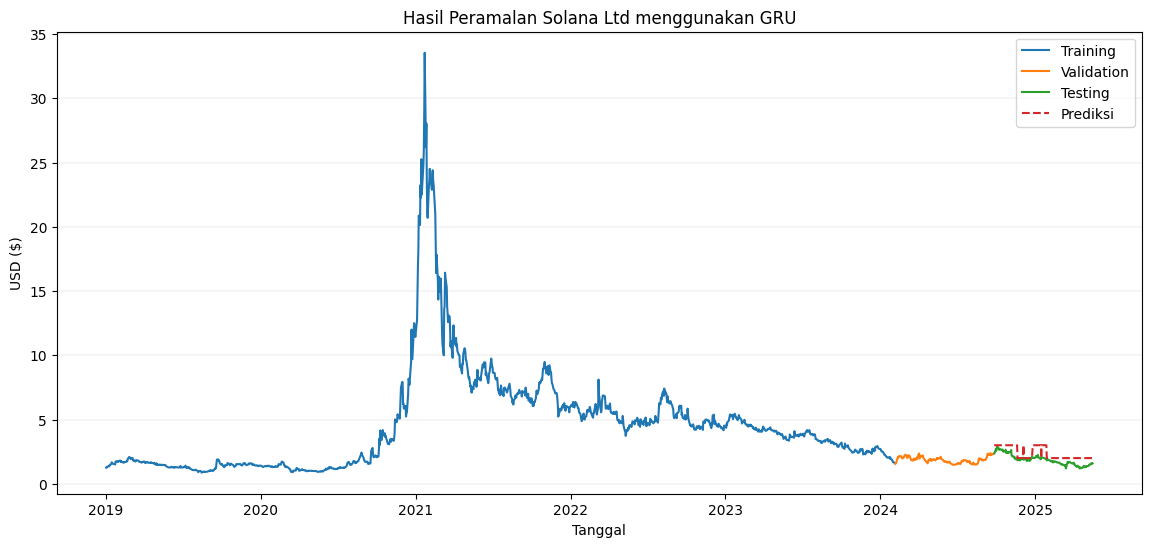

In [127]:
# Visualisasi Hasil Prediksi GRU
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Solana Ltd menggunakan GRU')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_gru['Date'], data_pred_gru['Close'], label='Testing')
plt.plot(data_pred_gru['Date'], data_pred_gru['Prediction_GRU'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [128]:
# Prediksi 30 Hari ke Depan
last_30_gru = data_sc[-30:]
input_pred_gru = last_30_gru.reshape(1, 30, 1)

future_preds_gru = []

for _ in range(30):
    next_pred_gru = model_gru.predict(input_pred_gru, verbose=0)[0][0]
    future_preds_gru.append(next_pred_gru)

    next_input_gru = np.append(input_pred_gru[0, 1:, 0], next_pred_gru)
    input_pred_gru = next_input_gru.reshape(1, 30, 1)

In [129]:
# Invers transformasi skala
future_preds_inv_gru = sc.inverse_transform(np.array(future_preds_gru).reshape(-1, 1))
future_preds_inv_gru = np.ceil(future_preds_inv_gru)

In [130]:
# Buat tanggal prediksi (hari kerja)
from datetime import timedelta

last_date_gru = pd.to_datetime(data['Date'].iloc[-1])
future_dates_gru = []
curr_date_gru = last_date_gru + timedelta(days=1)

while len(future_dates_gru) < 30:
    if curr_date_gru.weekday() < 5:
        future_dates_gru.append(curr_date_gru)
    curr_date_gru += timedelta(days=1)

In [131]:
# DataFrame hasil prediksi GRU
pred_30_gru_df = pd.DataFrame({
    'Date': future_dates_gru,
    'Prediction_GRU': future_preds_inv_gru.flatten()
})

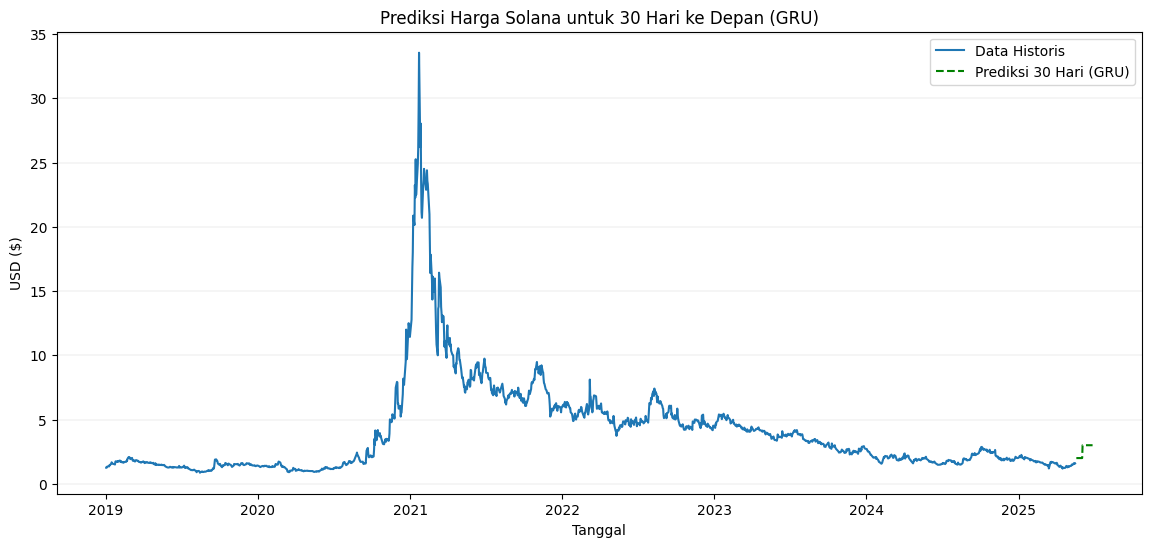

In [133]:
# Visualisasi hasil prediksi 30 hari ke depan dengan GRU
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Solana untuk 30 Hari ke Depan (GRU)')
plt.plot(data['Date'], data['Close'], label='Data Historis')
plt.plot(pred_30_gru_df['Date'], pred_30_gru_df['Prediction_GRU'], label='Prediksi 30 Hari (GRU)', linestyle='--', color='green')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# **LSTM**

In [244]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

model_lstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [245]:
# Path LSTM model checkpoint
checkpoint_path_lstm = 'model_checkpoints/weights_lstm_model.weights.h5'
checkpoint_gru = ModelCheckpoint(
    filepath=checkpoint_path_lstm,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [246]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

In [247]:
# Compile model LSTM
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Training model
history_lstm = model_lstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_gru, early_stopping]
)

Epoch 1/100
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073
Epoch 1: val_loss improved from inf to 0.00015, saving model to model_checkpoints/weights_lstm_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0072 - val_loss: 1.5049e-04
Epoch 2/100
150/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013
Epoch 2: val_loss improved from 0.00015 to 0.00009, saving model to model_checkpoints/weights_lstm_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - val_loss: 9.0764e-05
Epoch 3/100
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014
Epoch 3: val_loss improved from 0.00009 to 0.00005, saving model to model_checkpoints/weights_lstm_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 4.7116e-05
Epoch 4/100
153/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 4: val_loss did not improve from 0.00005
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0011 - val_loss: 3.3760e-04
Epoch 5/100
151/157 

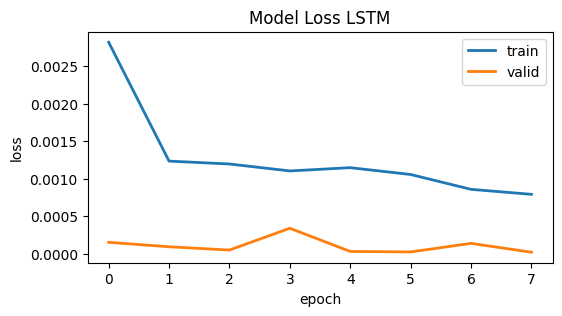

In [249]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_lstm.history['loss'], linewidth=2)
plt.plot(history_lstm.history['val_loss'], linewidth=2)
plt.title('Model Loss LSTM')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [250]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [254]:
# Load bobot model GRU terbaik
model_lstm.load_weights("/content/model_checkpoints/weights_lstm_model.weights.h5")

# Melakukan prediksi
y_pred_lstm = model_lstm.predict(x_test)
y_pred_lstm = np.ceil(sc.inverse_transform(y_pred_lstm))

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [255]:
# Evaluasi LSTM
mse_lstm = round(mean_squared_error(y_test, y_pred_lstm), 2)
rmse_lstm = round(np.sqrt(np.mean(y_test - y_pred_lstm)**2), 2)
mae_lstm = round(mean_absolute_error(y_test, y_pred_lstm), 2)
mape_lstm = round(mean_absolute_percentage_error(y_test, y_pred_lstm)*100, 2)

print("\n📊 Evaluasi GRU Model:")
print(f'MSE  : {mse_lstm}')
print(f'RMSE : {rmse_lstm}')
print(f'MAE  : {mae_lstm}')
print(f'MAPE : {mape_lstm} %')


📊 Evaluasi GRU Model:
MSE  : 0.31
RMSE : 0.48
MAE  : 0.48
MAPE : 27.27 %


In [256]:
# Dataframe hasil prediksi LSTM
data_pred_lstm = data[-test_len:].copy()
data_pred_lstm['Prediction_LSTM'] = y_pred_lstm

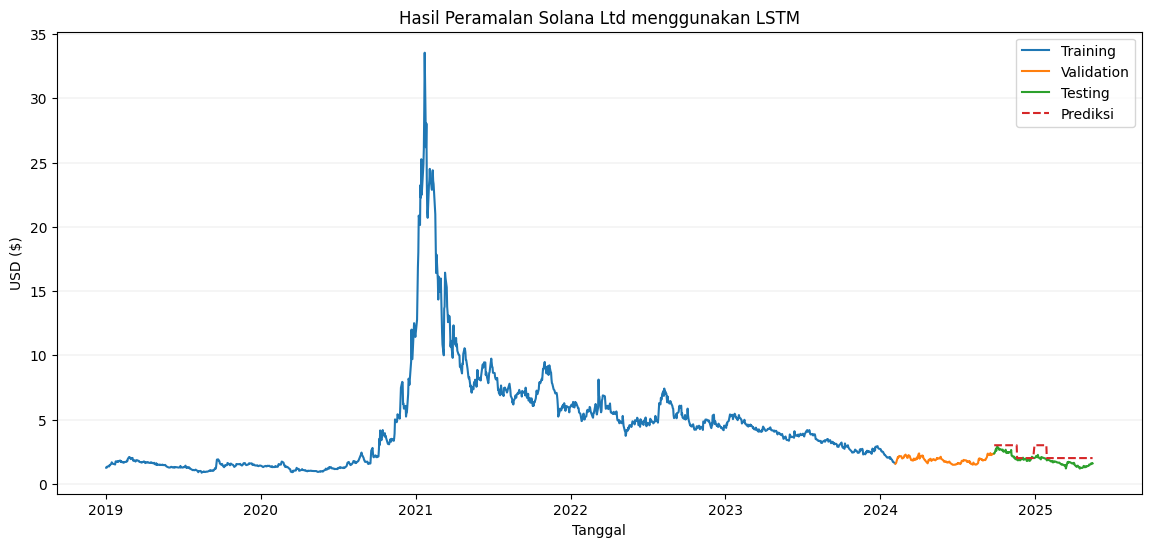

In [259]:
# Visualisasi Hasil Prediksi LSTM
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Solana Ltd menggunakan LSTM')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Close'], label='Testing')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Prediction_LSTM'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [263]:
# Prediksi 30 Hari ke Depan
last_30_lstm = data_sc[-30:]
input_pred_lstm = last_30_lstm.reshape(1, 30, 1)

future_preds_lstm = []

for _ in range(30):
    next_pred_lstm = model_lstm.predict(input_pred_lstm, verbose=0)[0][0]
    future_preds_lstm.append(next_pred_lstm)

    next_input_lstm = np.append(input_pred_lstm[0, 1:, 0], next_pred_lstm)
    input_pred_lstm = next_input_lstm.reshape(1, 30, 1)

In [264]:
# Invers transformasi skala
future_preds_inv_lstm = sc.inverse_transform(np.array(future_preds_lstm).reshape(-1, 1))
future_preds_inv_lstm = np.ceil(future_preds_inv_lstm)

In [265]:
# Buat tanggal prediksi (hari kerja)
from datetime import timedelta

last_date_lstm = pd.to_datetime(data['Date'].iloc[-1])
future_dates_lstm = []
curr_date_lstm = last_date_lstm + timedelta(days=1)

while len(future_dates_lstm) < 30:
    if curr_date_lstm.weekday() < 5:
        future_dates_lstm.append(curr_date_lstm)
    curr_date_lstm += timedelta(days=1)

In [266]:
# DataFrame hasil prediksi LSTM
pred_30_lstm_df = pd.DataFrame({
    'Date': future_dates_lstm,
    'Prediction_LSTM': future_preds_inv_lstm.flatten()
})

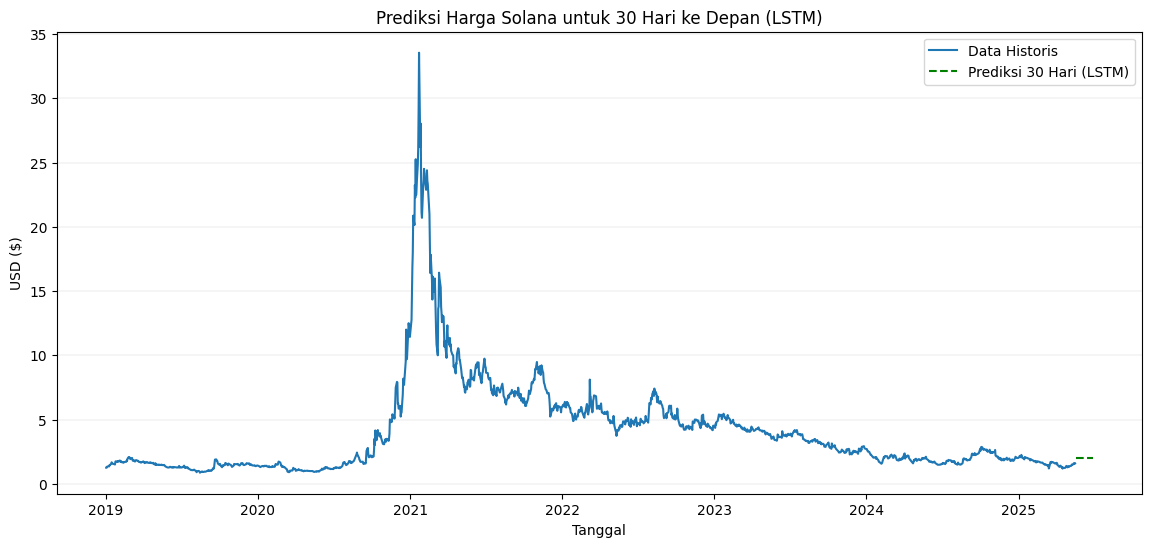

In [267]:
# Visualisasi hasil prediksi 30 hari ke depan dengan LSTM
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Solana untuk 30 Hari ke Depan (LSTM)')
plt.plot(data['Date'], data['Close'], label='Data Historis')
plt.plot(pred_30_lstm_df['Date'], pred_30_lstm_df['Prediction_LSTM'], label='Prediksi 30 Hari (LSTM)', linestyle='--', color='green')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# **Stacked GRU**

In [143]:
# Membangun model Stacked GRU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

model_stacked_gru = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    GRU(100, return_sequences=True),
    Dropout(0.2),
    GRU(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [187]:
# Path GRU model checkpoint
checkpoint_path_stacked_gru = 'model_checkpoints/weights_stacked_gru_model.weights.h5'
checkpoint_stacked_gru = ModelCheckpoint(
    filepath=checkpoint_path_gru,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [145]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

In [146]:
# Compile model Stacked GRU
model_stacked_gru.compile(optimizer='adam', loss='mean_squared_error')

# Training model Stacked GRU
history_stacked_gru = model_stacked_gru.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_gru, early_stopping]
)

Epoch 1/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0040
Epoch 1: val_loss improved from inf to 0.00005, saving model to model_checkpoints/weights_gru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0039 - val_loss: 5.0037e-05
Epoch 2/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3273e-04
Epoch 2: val_loss improved from 0.00005 to 0.00002, saving model to model_checkpoints/weights_gru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.2981e-04 - val_loss: 1.5926e-05
Epoch 3/100
152/157 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9224e-04
Epoch 3: val_loss did not improve from 0.00002
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.9433e-04 - val_loss: 5.2945e-05
Epoch 4/100
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8834e-04
Epoch 4: val_loss did not improve from 0.00002
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.8761e-04 - val_loss: 9.1043e-05
Epoch 5/100
151/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2974

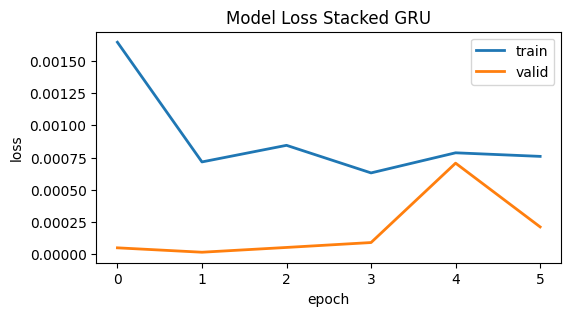

In [148]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_stacked_gru.history['loss'], linewidth=2)
plt.plot(history_stacked_gru.history['val_loss'], linewidth=2)
plt.title('Model Loss Stacked GRU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [152]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [153]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [155]:
# Load bobot model Stacked GRU terbaik
model_stacked_gru.load_weights("/content/model_checkpoints/weights_gru_model.weights.h5")

# Melakukan prediksi
y_pred_stacked_gru = model_stacked_gru.predict(x_test)
y_pred_stacked_gru = np.ceil(sc.inverse_transform(y_pred_stacked_gru))

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [156]:
# Evaluasi GRU
mse_stacked_gru = round(mean_squared_error(y_test, y_pred_stacked_gru), 2)
rmse_stacked_gru = round(np.sqrt(np.mean(y_test - y_pred_stacked_gru)**2), 2)
mae_stacked_gru = round(mean_absolute_error(y_test, y_pred_stacked_gru), 2)
mape_stacked_gru = round(mean_absolute_percentage_error(y_test, y_pred_stacked_gru) * 100, 2)

print("\n📊 Evaluasi Stacked GRU Model:")
print(f'MSE  : {mse_stacked_gru}')
print(f'RMSE : {rmse_stacked_gru}')
print(f'MAE  : {mae_stacked_gru}')
print(f'MAPE : {mape_stacked_gru} %')


📊 Evaluasi Stacked GRU Model:
MSE  : 0.24
RMSE : 0.4
MAE  : 0.41
MAPE : 23.84 %


In [177]:
# Create DataFrame for predictions
data_pred_stacked_gru = data[-test_len:].copy()
data_pred_stacked_gru['Prediction_Stacked_GRU'] = y_pred_stacked_gru

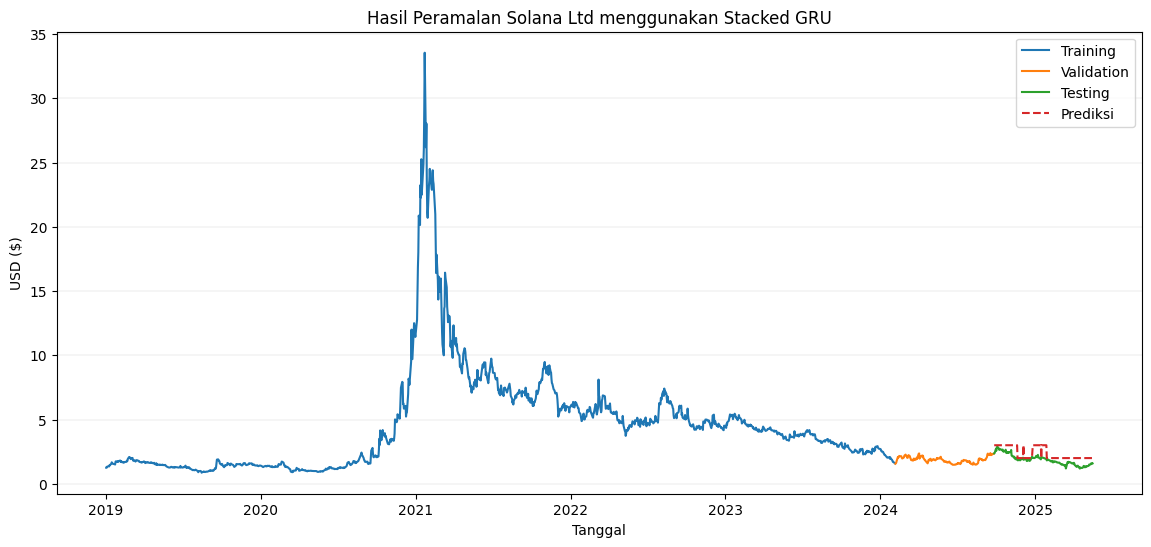

In [178]:
# Dataframe hasil prediksi GRU
data_pred_stacked_gru = data[-test_len:].copy()
data_pred_stacked_gru['Prediction_Stacked_GRU'] = y_pred_gru

# Visualisasi Hasil Prediksi GRU
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Solana Ltd menggunakan Stacked GRU')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_stacked_gru['Date'], data_pred_stacked_gru['Close'], label='Testing')
plt.plot(data_pred_stacked_gru['Date'], data_pred_stacked_gru['Prediction_Stacked_GRU'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [179]:
# Prediksi 30 Hari ke Depan (Future Forecasting)
last_30_stacked_gru = data_sc[-30:]
input_pred_stacked_gru = last_30_stacked_gru.reshape(1, 30, 1)

future_preds_stacked_gru = []

for _ in range(30):
    next_pred_stacked_gru = model_gru.predict(input_pred_stacked_gru, verbose=0)[0][0]
    future_preds_stacked_gru.append(next_pred_stacked_gru)

    next_input_stacked_gru = np.append(input_pred_stacked_gru[0, 1:, 0], next_pred_stacked_gru)
    input_pred_stacked_gru = next_input_stacked_gru.reshape(1, 30, 1)

In [180]:
# Invers transformasi skala
future_preds_inv_stacked_gru = sc.inverse_transform(np.array(future_preds_stacked_gru).reshape(-1, 1))
future_preds_inv_stacked_gru = np.ceil(future_preds_inv_stacked_gru)

In [181]:
# Buat tanggal prediksi (hanya hari kerja)
from datetime import timedelta

last_date_stacked_gru = pd.to_datetime(data['Date'].iloc[-1])
future_dates_stacked_gru = []
curr_date_stackede_gru = last_date_stacked_gru + timedelta(days=1)

while len(future_dates_stacked_gru) < 30:
    if curr_date_stackede_gru.weekday() < 5:
        future_dates_stacked_gru.append(curr_date_stackede_gru)
    curr_date_stackede_gru += timedelta(days=1)

# Buat DataFrame hasil prediksi GRU
pred_30_stacked_gru_df = pd.DataFrame({
    'Date': future_dates_stacked_gru,
    'Prediction_GRU': future_preds_inv_stacked_gru.flatten()
})

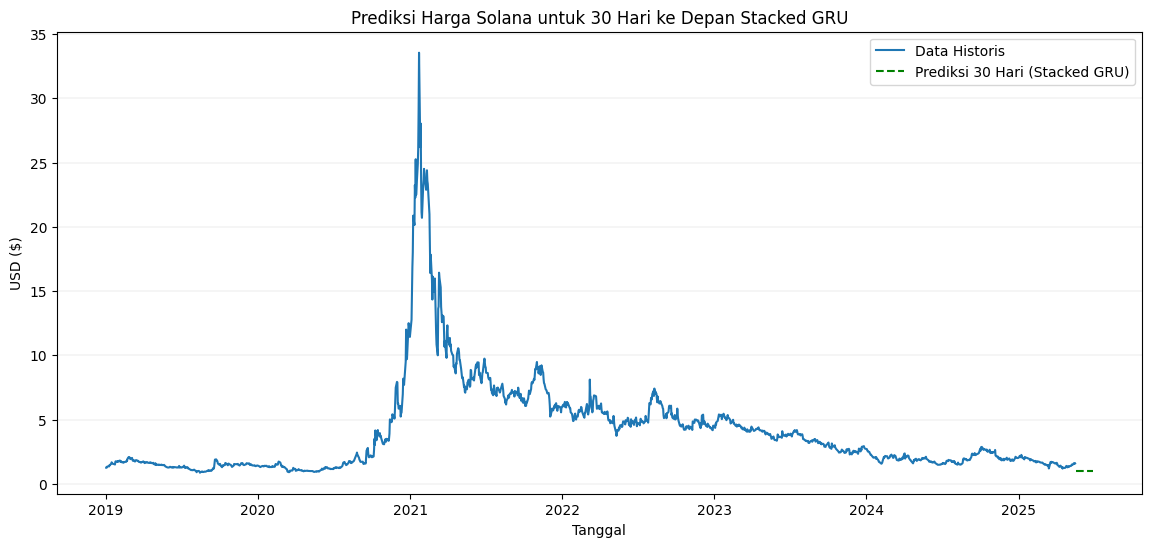

In [279]:
# Visualisasi hasil prediksi 30 hari ke depan dengan Stacked GRU
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Solana untuk 30 Hari ke Depan Stacked GRU')
plt.plot(data['Date'], data['Close'], label='Data Historis')
plt.plot(pred_30_stacked_gru_df['Date'], pred_30_stacked_gru_df['Prediction_GRU'], label='Prediksi 30 Hari (Stacked GRU)', linestyle='--', color='green')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# **Stacked LSTM**

In [186]:
# Membangun model Stacked LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

model_stacked_lstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    GRU(100, return_sequences=True),
    Dropout(0.2),
    GRU(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [213]:
# Path Stacked LSTM model checkpoint
checkpoint_path_stacked_lstm = 'model_checkpoints/weights_stacked_lstm_model.weights.h5'
checkpoint_stacked_lstm = ModelCheckpoint(
    filepath=checkpoint_path_stacked_lstm,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [214]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

In [215]:
# Compile model Stacked LSTM
model_stacked_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Training model Stacked LSTM
history_stacked_lstm = model_stacked_lstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_gru, early_stopping]
)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1449e-04
Epoch 1: val_loss did not improve from 0.00001
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 7.1431e-04 - val_loss: 0.0011
Epoch 2/100
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 2: val_loss did not improve from 0.00001
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0012 - val_loss: 5.0737e-04
Epoch 3/100
152/157 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5561e-04
Epoch 3: val_loss did not improve from 0.00001
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5465e-04 - val_loss: 3.9937e-04
Epoch 4/100
152/157 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4968e-04
Epoch 4: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoints/weights_gru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.4855e-04 - val_loss: 1.2257e-05
Epoch 5/100
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 5: val_loss did not improve from 0.00001
157/157 ━━━━━━━━━━━━━

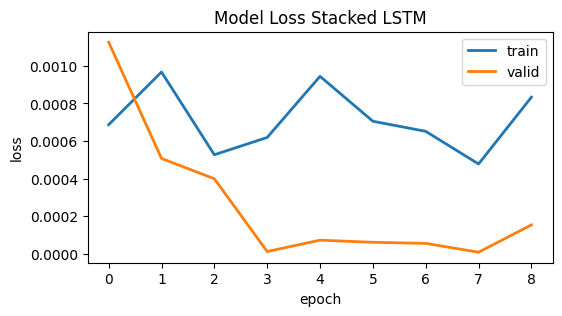

In [216]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_stacked_lstm.history['loss'], linewidth=2)
plt.plot(history_stacked_lstm.history['val_loss'], linewidth=2)
plt.title('Model Loss Stacked LSTM')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [217]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [220]:
# Load bobot model terbaik Stacked LSTM
#model_stacked_lstm.load_weights("/content/model_checkpoints/weights_stacked_lstm_model.weights.h5")

In [212]:
# Melakukan prediksi
y_pred_stacked_lstm = model_stacked_lstm.predict(x_test)
y_pred_stacked_lstm = np.ceil(sc.inverse_transform(y_pred_stacked_lstm))

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [221]:
# Evaluasi GRU
mse_stacked_lstm = round(mean_squared_error(y_test, y_pred_stacked_lstm), 2)
rmse_stacked_lstm = round(np.sqrt(np.mean(y_test - y_pred_stacked_lstm)**2), 2)
mae_stacked_lstm = round(mean_absolute_error(y_test, y_pred_stacked_lstm), 2)
mape_stacked_lstm = round(mean_absolute_percentage_error(y_test, y_pred_stacked_lstm) * 100, 2)

print("\n📊 Evaluasi Stacked LSTM Model:")
print(f'MSE  : {mse_stacked_lstm}')
print(f'RMSE : {rmse_stacked_lstm}')
print(f'MAE  : {mae_stacked_lstm}')
print(f'MAPE : {mape_stacked_lstm} %')


📊 Evaluasi Stacked GRU Model:
MSE  : 0.28
RMSE : 0.44
MAE  : 0.45
MAPE : 25.81 %


In [222]:
# Dataframe hasil prediksi Stacked LSTM
data_pred_stacked_lstm = data[-test_len:].copy()
data_pred_stacked_lstm['Prediction_Stacked_LSTM'] = y_pred_stacked_lstm

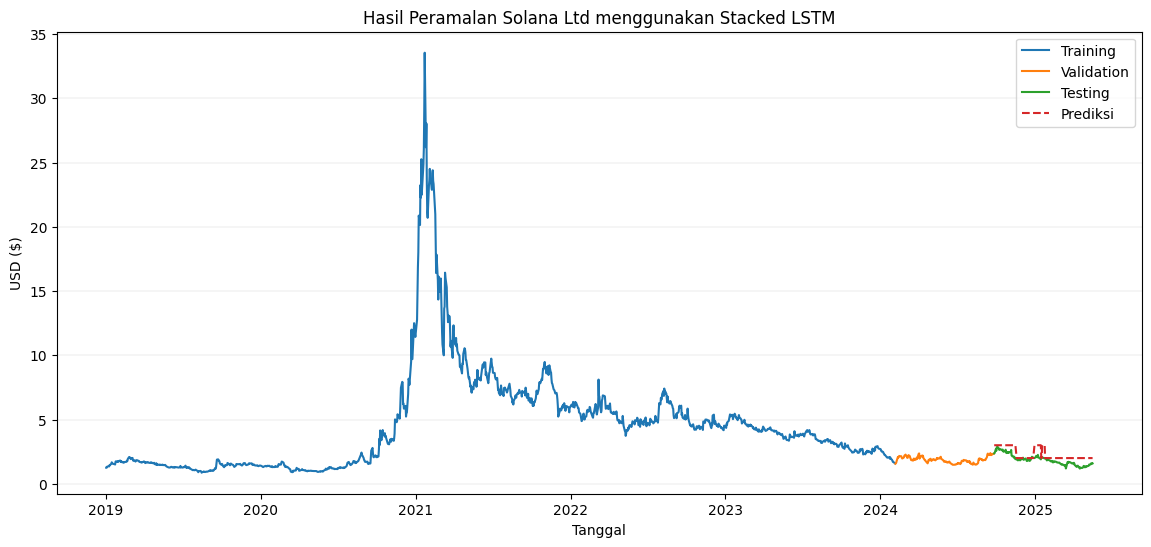

In [224]:
# Visualisasi Hasil Prediksi Stacked LSTM
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Solana Ltd menggunakan Stacked LSTM')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Close'], label='Testing')
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Prediction_Stacked_LSTM'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [225]:
# Prediksi 30 Hari ke Depan (Future Forecasting)
last_30_stacked_lstm = data_sc[-30:]
input_pred_stacked_lstm = last_30_stacked_lstm.reshape(1, 30, 1)

future_preds_stacked_lstm = []

for _ in range(30):
    next_pred_stacked_lstm = model_stacked_lstm.predict(input_pred_stacked_lstm, verbose=0)[0][0]
    future_preds_stacked_lstm.append(next_pred_stacked_lstm)

    next_input_stacked_lstm = np.append(input_pred_stacked_lstm[0, 1:, 0], next_pred_stacked_lstm)
    input_pred_stacked_lstm = next_input_stacked_lstm.reshape(1, 30, 1)

In [226]:
# Invers transformasi skala
future_preds_inv_stacked_lstm = sc.inverse_transform(np.array(future_preds_stacked_lstm).reshape(-1, 1))
future_preds_inv_stacked_lstm = np.ceil(future_preds_inv_stacked_lstm)

# Buat tanggal prediksi (hanya hari kerja)
from datetime import timedelta

last_date_stacked_lstm = pd.to_datetime(data['Date'].iloc[-1])
future_dates_stacked_lstm = []
curr_date_stacked_lstm = last_date_stacked_lstm + timedelta(days=1)

while len(future_dates_stacked_lstm) < 30:
    if curr_date_stacked_lstm.weekday() < 5:
        future_dates_stacked_lstm.append(curr_date_stacked_lstm)
    curr_date_stacked_lstm += timedelta(days=1)

In [227]:
# Buat DataFrame hasil prediksi Stacked LSTM
pred_30_stacked_lstm_df = pd.DataFrame({
    'Date': future_dates_gru,
    'Prediction_Stacked_LSTM': future_preds_inv_stacked_lstm.flatten()
})

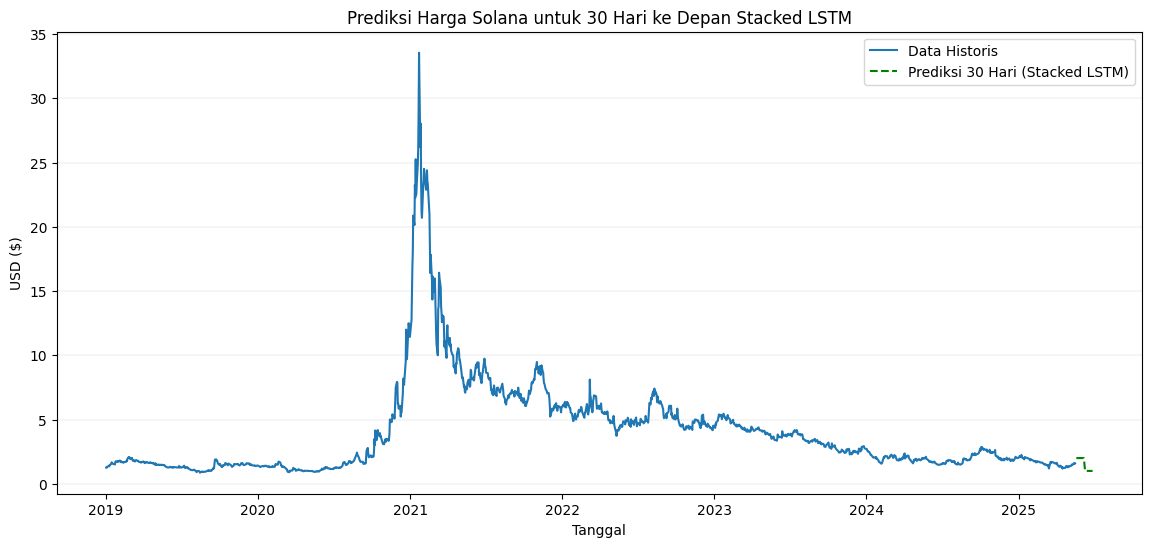

In [228]:
# Visualisasi hasil prediksi 30 hari ke depan dengan Stacked LSTM
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Solana untuk 30 Hari ke Depan Stacked LSTM')
plt.plot(data['Date'], data['Close'], label='Data Historis')
plt.plot(pred_30_stacked_lstm_df['Date'], pred_30_stacked_lstm_df['Prediction_Stacked_LSTM'], label='Prediksi 30 Hari (Stacked LSTM)', linestyle='--', color='green')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# **Perbandingan**

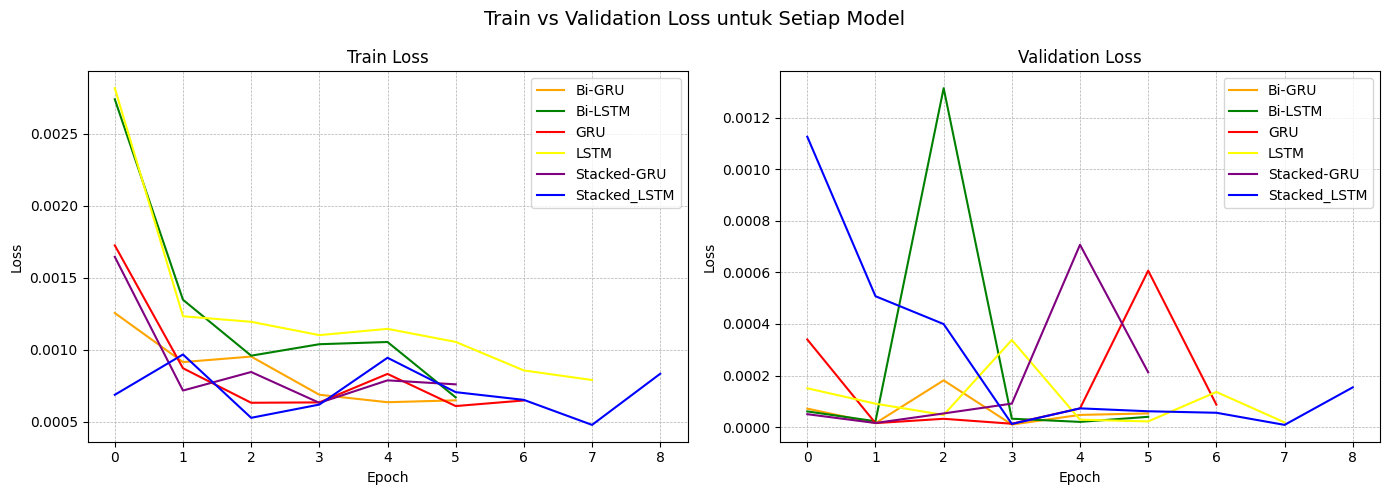

In [269]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Train vs Validation Loss untuk Setiap Model', fontsize=14)

# Train Loss
axs[0].plot(history_bigru.history['loss'], label='Bi-GRU', color='orange')
axs[0].plot(history_bilstm.history['loss'], label='Bi-LSTM', color='green')
axs[0].plot(history_gru.history['loss'], label='GRU', color='red')
axs[0].plot(history_lstm.history['loss'], label='LSTM', color='yellow')
axs[0].plot(history_stacked_gru.history['loss'], label='Stacked-GRU', color='Purple')
axs[0].plot(history_stacked_lstm.history['loss'], label='Stacked_LSTM', color='Blue')
axs[0].set_title('Train Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True, linestyle='--', linewidth=0.5)

# Validation Loss
axs[1].plot(history_bigru.history['val_loss'], label='Bi-GRU', color='orange')
axs[1].plot(history_bilstm.history['val_loss'], label='Bi-LSTM', color='green')
axs[1].plot(history_gru.history['val_loss'], label='GRU', color='red')
axs[1].plot(history_lstm.history['val_loss'], label='LSTM', color='yellow')
axs[1].plot(history_stacked_gru.history['val_loss'], label='Stacked-GRU', color='Purple')
axs[1].plot(history_stacked_lstm.history['val_loss'], label='Stacked_LSTM', color='Blue')
axs[1].set_title('Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [272]:
print("\n📊 Evaluasi Bi-GRU Model:")
print(f'MSE  : {mse_bigru}')
print(f'RMSE : {rmse_bigru}')
print(f'MAE  : {mae_bigru}')
print(f'MAPE : {mape_bigru} %')

print("\n📊 Evaluasi Bi-LSTM Model:")
print(f'MSE  : {mse_bilstm}')
print(f'RMSE : {rmse_bilstm}')
print(f'MAE  : {mae_bilstm}')
print(f'MAPE : {mape_bilstm} %')

print("\n📊 Evaluasi GRU Model:")
print(f'MSE  : {mse_gru}')
print(f'RMSE : {rmse_gru}')
print(f'MAE  : {mae_gru}')
print(f'MAPE : {mape_gru} %')

print("\n📊 Evaluasi LSTM Model:")
print(f'MSE  : {mse_lstm}')
print(f'RMSE : {rmse_lstm}')
print(f'MAE  : {mae_lstm}')
print(f'MAPE : {mape_lstm} %')

print("\n📊 Evaluasi Stacked GRU Model:")
print(f'MSE  : {mse_stacked_gru}')
print(f'RMSE : {rmse_stacked_gru}')
print(f'MAE  : {mae_stacked_gru}')
print(f'MAPE : {mape_stacked_gru} %')

print("\n📊 Evaluasi Stacked LSTM Model:")
print(f'MSE  : {mse_stacked_lstm}')
print(f'RMSE : {rmse_stacked_lstm}')
print(f'MAE  : {mae_stacked_lstm}')
print(f'MAPE : {mape_stacked_lstm} %')


📊 Evaluasi Bi-GRU Model:
MSE  : 0.31
RMSE : 0.48
MAE  : 0.48
MAPE : 27.3 %

📊 Evaluasi Bi-LSTM Model:
MSE  : 0.33
RMSE : 0.49
MAE  : 0.49
MAPE : 27.92 %

📊 Evaluasi GRU Model:
MSE  : 0.33
RMSE : 0.49
MAE  : 0.5
MAPE : 28.26 %

📊 Evaluasi LSTM Model:
MSE  : 0.31
RMSE : 0.48
MAE  : 0.48
MAPE : 27.27 %

📊 Evaluasi Stacked GRU Model:
MSE  : 0.24
RMSE : 0.4
MAE  : 0.41
MAPE : 23.84 %

📊 Evaluasi Stacked LSTM Model:
MSE  : 0.28
RMSE : 0.44
MAE  : 0.45
MAPE : 25.81 %


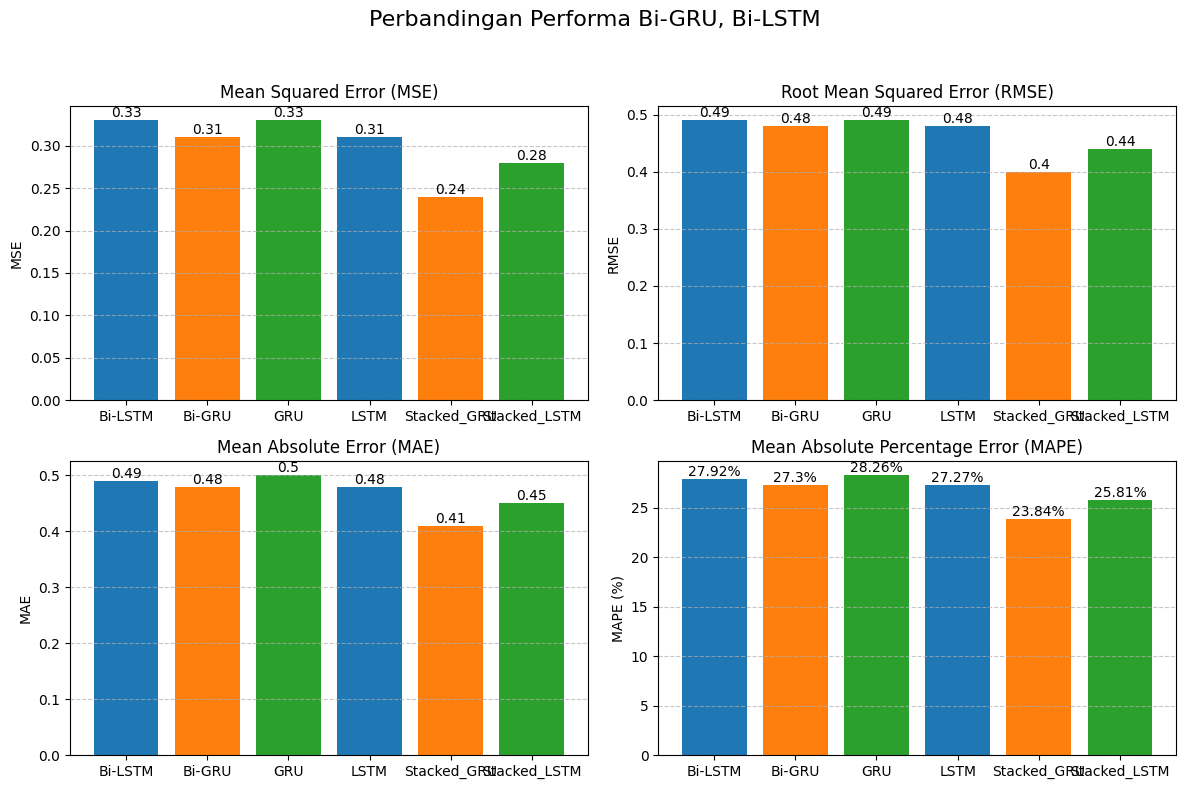

In [273]:
import matplotlib.pyplot as plt
import numpy as np

# Data for comparison
algorithms = ['Bi-LSTM', 'Bi-GRU', 'GRU', 'LSTM','Stacked_GRU', 'Stacked_LSTM']
mse_values = [mse_bilstm, mse_bigru, mse_gru, mse_lstm, mse_stacked_gru, mse_stacked_lstm]
rmse_values = [rmse_bilstm, rmse_bigru, rmse_gru, rmse_lstm, rmse_stacked_gru, rmse_stacked_lstm]
mae_values = [mae_bilstm, mae_bigru, mae_gru, mae_lstm, mae_stacked_gru, mae_stacked_lstm]
mape_values = [mape_bilstm, mape_bigru, mape_gru, mape_lstm, mape_stacked_gru, mape_stacked_lstm]

# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Perbandingan Performa Bi-GRU, Bi-LSTM', fontsize=16)

# Bar plot for MSE
axs[0, 0].bar(algorithms, mse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(mse_values):
    axs[0, 0].text(i, v, str(v), ha='center', va='bottom')

# Bar plot for RMSE
axs[0, 1].bar(algorithms, rmse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axs[0, 1].set_title('Root Mean Squared Error (RMSE)')
axs[0, 1].set_ylabel('RMSE')
axs[0, 1].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(rmse_values):
    axs[0, 1].text(i, v, str(v), ha='center', va='bottom')

# Bar plot for MAE
axs[1, 0].bar(algorithms, mae_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axs[1, 0].set_title('Mean Absolute Error (MAE)')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(mae_values):
    axs[1, 0].text(i, v, str(v), ha='center', va='bottom')

# Bar plot for MAPE
axs[1, 1].bar(algorithms, mape_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axs[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')
axs[1, 1].set_ylabel('MAPE (%)')
axs[1, 1].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(mape_values):
    axs[1, 1].text(i, v, f'{v}%', ha='center', va='bottom')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

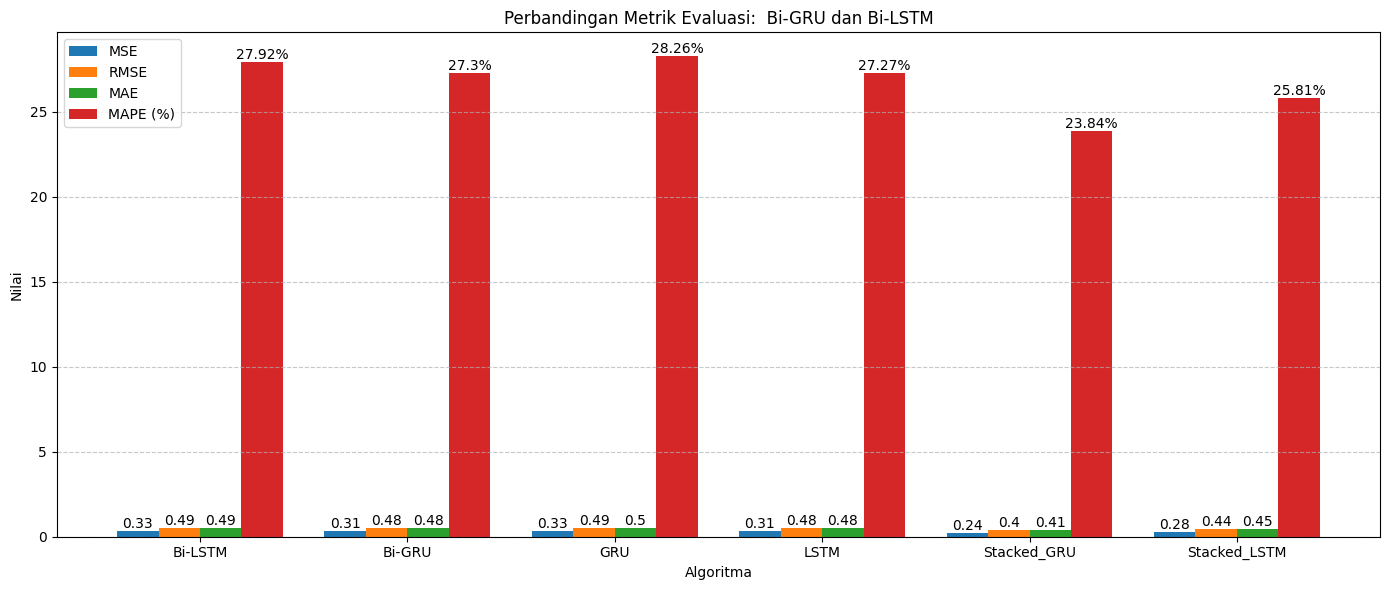

In [274]:
import matplotlib.pyplot as plt
import numpy as np

# Data for comparison
algorithms = ['Bi-LSTM', 'Bi-GRU', 'GRU','LSTM', 'Stacked_GRU','Stacked_LSTM']
mse_values = [mse_bilstm, mse_bigru, mse_gru, mse_lstm, mse_stacked_gru, mse_stacked_lstm]
rmse_values = [rmse_bilstm, rmse_bigru, rmse_gru, rmse_lstm, rmse_stacked_gru, rmse_stacked_lstm]
mae_values = [mae_bilstm, mae_bigru, mae_gru, mae_lstm, mae_stacked_gru, mae_stacked_lstm]
mape_values = [mape_bilstm, mape_bigru, mape_gru, mape_lstm, mape_stacked_gru, mape_stacked_lstm]

# Combined bar plot for all metrics
fig = plt.figure(figsize=(14, 6))
x = np.arange(len(algorithms))
width = 0.2

plt.bar(x - 1.5*width, mse_values, width, label='MSE', color='#1f77b4')
plt.bar(x - 0.5*width, rmse_values, width, label='RMSE', color='#ff7f0e')
plt.bar(x + 0.5*width, mae_values, width, label='MAE', color='#2ca02c')
plt.bar(x + 1.5*width, mape_values, width, label='MAPE (%)', color='#d62728')

plt.xlabel('Algoritma')
plt.ylabel('Nilai')
plt.title('Perbandingan Metrik Evaluasi:  Bi-GRU dan Bi-LSTM')
plt.xticks(x, algorithms)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, v in enumerate(mse_values):
    plt.text(i - 1.5*width, v, str(v), ha='center', va='bottom')
for i, v in enumerate(rmse_values):
    plt.text(i - 0.5*width, v, str(v), ha='center', va='bottom')
for i, v in enumerate(mae_values):
    plt.text(i + 0.5*width, v, str(v), ha='center', va='bottom')
for i, v in enumerate(mape_values):
    plt.text(i + 1.5*width, v, f'{v}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

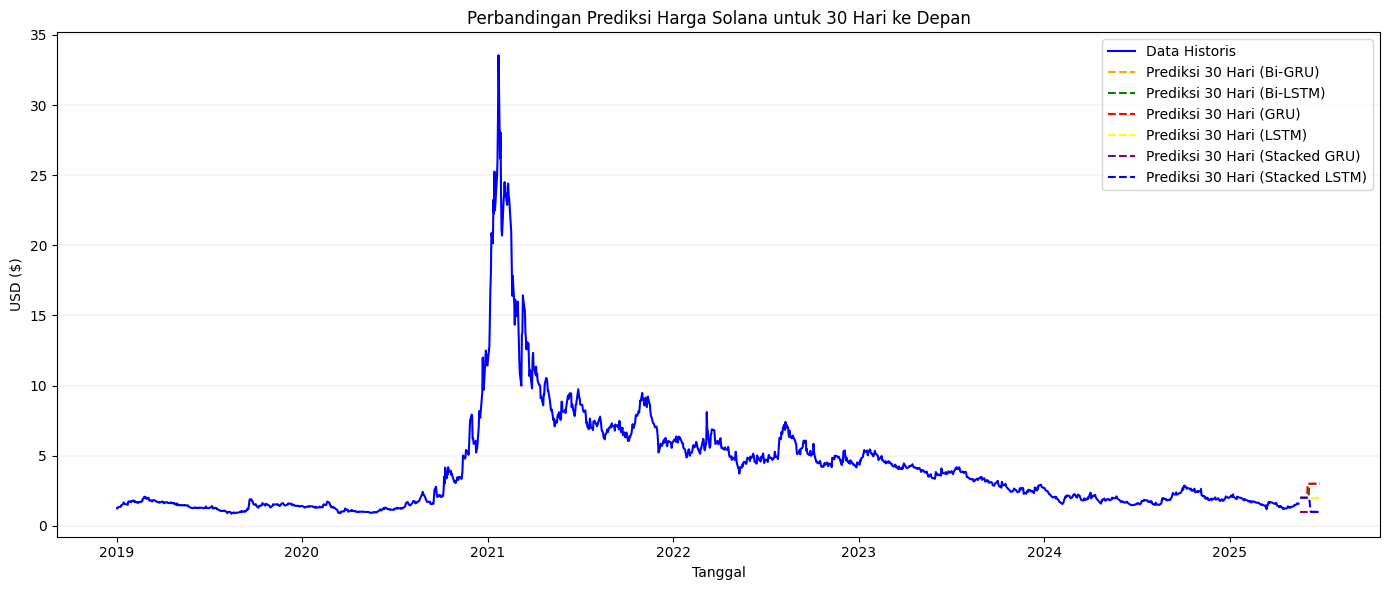

In [281]:
# Visualisasi gabungan hasil prediksi 30 hari ke depan dari GRU, Bi-GRU, dan Stacked GRU
plt.figure(figsize=(14,6))
plt.title('Perbandingan Prediksi Harga Solana untuk 30 Hari ke Depan')

# Plot data historis
plt.plot(data['Date'], data['Close'], label='Data Historis', color='blue')

# Plot prediksi dari masing-masing model
plt.plot(pred_30_bigru_df['Date'], pred_30_bigru_df['Prediction_BIGRU'], label='Prediksi 30 Hari (Bi-GRU)', linestyle='--', color='orange')
plt.plot(pred_30_bilstm_df['Date'], pred_30_bilstm_df['Prediction_BILSTM'], label='Prediksi 30 Hari (Bi-LSTM)', linestyle='--', color='green')
plt.plot(pred_30_gru_df['Date'], pred_30_gru_df['Prediction_GRU'], label='Prediksi 30 Hari (GRU)', linestyle='--', color='red')
plt.plot(pred_30_lstm_df['Date'], pred_30_lstm_df['Prediction_LSTM'], label='Prediksi 30 Hari (LSTM)', linestyle='--', color='yellow')
plt.plot(pred_30_stacked_gru_df['Date'], pred_30_stacked_gru_df['Prediction_GRU'], label='Prediksi 30 Hari (Stacked GRU)', linestyle='--', color='purple')
plt.plot(pred_30_stacked_lstm_df['Date'], pred_30_stacked_lstm_df['Prediction_Stacked_LSTM'], label='Prediksi 30 Hari (Stacked LSTM)', linestyle='--', color='blue')

# Label dan legend
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.tight_layout()
plt.show()